In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import pickle
import time
import multiprocessing as mp

In [2]:
import spacy

get the number of paragraph

In [3]:
df = pd.read_csv('df_10k_20200202.csv')

In [4]:
df = df.drop(['Unnamed: 0','Unnamed: 0.1'],axis =1)
df.head()

,file,CIK,type,yeara,fraud_match,SIC_fl_rp,save_path_7,num_para,num_words,gvkey_x,...,ib,ivao,dlc,sstk,dltis,pstk,lt,ivst,cogs,dp
0,edgar/data/798757/0001035704-99-000038.txt,798757,10-k,1998,0,7372.0,/research/jujun/saveitem_1128/item7/798757-000...,70,8248,65466.0,...,74.468,322.527,0.0,47.824,0.0,0.000,366.477,28.667,400.552,22.701
1,edgar/data/798757/0000950134-00-000532.txt,798757,10-k,1999,0,7372.0,/research/jujun/saveitem_1128/item7/798757-000...,100,11760,65466.0,...,-39.224,246.564,0.0,31.568,0.0,0.000,347.808,62.546,453.871,25.421
2,edgar/data/798757/0000950109-02-006127.txt,798757,10-k,2002,0,7372.0,/research/jujun/saveitem_1128/item7/798757-000...,124,14220,65466.0,...,46.193,17.203,0.0,16.705,0.0,0.000,367.768,0.301,350.605,31.264
3,edgar/data/798757/0001035704-01-000019.txt,798757,10-k,2000,0,7372.0,/research/jujun/saveitem_1128/item7/798757-000...,108,12623,65466.0,...,-15.422,107.458,0.0,41.829,0.0,89.113,390.930,49.434,441.998,31.039
4,edgar/data/798757/0001035704-02-000070.txt,798757,10-k,2001,0,7372.0,/research/jujun/saveitem_1128/item7/798757-000...,110,12233,65466.0,...,-179.753,0.702,0.0,25.962,0.0,0.000,362.073,1.515,412.687,31.910


In [5]:
df_1 = df[df.yeara <= 2012]

In [6]:
nlp = spacy.load('en_core_web_sm',disable = ['ner','parser'])

In [7]:
def clean_text(text):
    paras_cl = []
    paras = text.split("\n\n")
    #print(paras)
    for para in paras:
        #print(para)
        p1 = re.findall("[a-zA-Z]", para.lower())
        num_p = len(p1)
        #print(num_p)

        p2 = re.sub("[^a-zA-Z]"," ",para)
        space_num = p2.count(' ')
        #print(space_num)

        if num_p*2 < space_num:
            para = ""   
        elif num_p <= 25:
            para = ""
        else:pass
        paras_cl.append(para)
        
    para_cl_fl = list(filter(None,paras_cl))
    para_cl_fl_2 = [re.sub(r"\n"," ",i) for i in para_cl_fl]
    

    para_cl_fl_3 = []
    for p_2 in para_cl_fl_2:
        para_list = []
        t_convert = nlp(p_2)
        for token in t_convert:
            
            if token.pos_ == 'NUM':
                para_list.append('dd')
            else: para_list.append(token)
            
        para_list_1 = [str(p) for p in para_list]
        para_list_2 = ' '.join(para_list_1)
        para_cl_fl_3.append(para_list_2)
        
    return para_cl_fl_3

In [8]:
def text_prepare(x, df):
    with open(df.save_path_7[x]) as f:
        text = f.read()
    f.close() 
    text_cl = clean_text(text)
    return (text_cl, df.fraud_match[x], df.CIK[x], df.file[x])

In [11]:
threads = 0
finishes = 0
pool=mp.Pool(processes=10)
results = []
text_para = []
start= time.time()
for idx in df_1.index:
    
    threads += 1
    if threads%100 == 0:
        print("send process {}".format(threads))
      
    results.append(pool.apply_async(text_prepare, args=(idx,df_1)))

for rs in results:
    finishes+=1
    if finishes%100 == 0:
        print("finish process {} @ {}".format(finishes, time.time()-start))
    text_para.append(rs.get())     
    


send process 100
send process 200
send process 300
send process 400
send process 500
send process 600
send process 700
send process 800
send process 900
send process 1000
send process 1100
send process 1200
send process 1300
send process 1400
send process 1500
send process 1600
send process 1700
send process 1800
send process 1900
send process 2000
send process 2100
send process 2200
send process 2300
send process 2400
send process 2500
send process 2600
send process 2700
send process 2800
send process 2900
send process 3000
send process 3100
send process 3200
send process 3300
send process 3400
send process 3500
send process 3600
send process 3700
send process 3800
send process 3900
send process 4000
send process 4100
send process 4200
send process 4300
send process 4400
send process 4500
send process 4600
send process 4700
send process 4800
send process 4900
send process 5000
send process 5100
send process 5200
send process 5300
send process 5400
send process 5500
send process 5600
s

finish process 100 @ 14.42745065689087
finish process 200 @ 29.9706974029541
finish process 300 @ 42.50750494003296
finish process 400 @ 55.704946994781494
finish process 500 @ 68.15267634391785
finish process 600 @ 81.77851438522339
finish process 700 @ 94.4139358997345
finish process 800 @ 107.73148679733276
finish process 900 @ 120.27166843414307
finish process 1000 @ 134.25905752182007
finish process 1100 @ 147.55582332611084
finish process 1200 @ 159.87922596931458
finish process 1300 @ 173.93158745765686
finish process 1400 @ 186.8154923915863
finish process 1500 @ 200.11417365074158
finish process 1600 @ 214.54542684555054
finish process 1700 @ 227.42210340499878
finish process 1800 @ 241.25925374031067
finish process 1900 @ 254.2702920436859
finish process 2000 @ 267.04967975616455
finish process 2100 @ 281.0156440734863
finish process 2200 @ 295.1706087589264
finish process 2300 @ 307.61264729499817
finish process 2400 @ 320.6538579463959
finish process 2500 @ 334.080357789993

finish process 20200 @ 2743.8908796310425
finish process 20300 @ 2759.2039222717285
finish process 20400 @ 2773.5839779376984
finish process 20500 @ 2788.6735706329346
finish process 20600 @ 2805.429723262787
finish process 20700 @ 2818.5928926467896
finish process 20800 @ 2833.816297531128
finish process 20900 @ 2850.0061345100403
finish process 21000 @ 2865.380648612976
finish process 21100 @ 2880.6191194057465
finish process 21200 @ 2896.1984062194824
finish process 21300 @ 2908.842162132263
finish process 21400 @ 2921.5391280651093
finish process 21500 @ 2934.648401737213
finish process 21600 @ 2949.4602031707764
finish process 21700 @ 2961.3895530700684
finish process 21800 @ 2975.161384344101
finish process 21900 @ 2988.918211698532
finish process 22000 @ 3001.183154821396
finish process 22100 @ 3014.3025319576263
finish process 22200 @ 3027.710399389267
finish process 22300 @ 3040.75581073761
finish process 22400 @ 3054.1243934631348
finish process 22500 @ 3066.7125911712646
fin

finish process 40100 @ 5507.960009336472
finish process 40200 @ 5521.042883634567
finish process 40300 @ 5534.672519445419
finish process 40400 @ 5548.06147313118
finish process 40500 @ 5561.128679275513
finish process 40600 @ 5574.249642372131
finish process 40700 @ 5587.013290405273
finish process 40800 @ 5600.662060499191
finish process 40900 @ 5613.507603168488
finish process 41000 @ 5627.106609106064
finish process 41100 @ 5639.812006235123
finish process 41200 @ 5652.625330924988
finish process 41300 @ 5667.4981899261475
finish process 41400 @ 5681.766692399979
finish process 41500 @ 5694.947248697281
finish process 41600 @ 5707.291590690613
finish process 41700 @ 5720.448947668076
finish process 41800 @ 5733.651058912277
finish process 41900 @ 5746.249813556671
finish process 42000 @ 5760.282762050629
finish process 42100 @ 5775.2132999897
finish process 42200 @ 5787.25750041008
finish process 42300 @ 5799.422003984451
finish process 42400 @ 5812.87779378891
finish process 42500

In [14]:
with open('data_20200212_2012', 'wb') as fp:
     pickle.dump(text_para, fp)
fp.close()

In [12]:
text_para[10]

(['the company is a leader in the production and marketing of beverage alcohol brands in north america and the united kingdom , and a leading independent drinks wholesaler in the united   kingdom .   as the second largest   supplier of wine , the second   largest   importer of beer and the fourth   largest   supplier of distilled spirits , the company is the largest single - source   supplier of these products in the united states .   in the united kingdom ,   the company is a leading marketer of wine and the second largest producer and marketer of cider .',
  'the company   reports its operating   results in dd   segments :   canandaigua wine ( branded popular premium wine and brandy , and other ,   primarily grape juice concentrate ) ;   barton   ( primarily   beer and   distilled   spirits ) ;   matthew clark ( branded wine ,   cider , and bottled water , and wholesale wine ,   cider ,   distilled spirits , beer and soft drinks ) ;   franciscan ( primarily branded super - premium an

In [13]:
text_para[30]

(['this report contains certain forward - looking   statements ,   including information about or related to our future results , certain projections and business trends . assumptions   relating   to   forward - looking   statements   involve   judgments   with respect   to ,   among   other   things ,   future   economic ,   competitive   and   market conditions   and   future   business   decisions ,   all of   which   are   difficult   or impossible to predict accurately and many of which are beyond our control .   when used in this   report ,   the words   " estimate , "   " project , "   " intend , "   " believe , " " expect "   and similar   expressions   are   intended   to   identify   forward - looking statements .    although   we   believe    that   our    assumptions    underlying    the forward - looking   statements are reasonable ,   any or all of the assumptions could prove   inaccurate ,   and we may   not   realize   the   results   contemplated   by the forward - loo

In [11]:
def generate_doc(x):
    return ' '.join(x)

In [12]:
text_doc = []
for d in text_para:
    text_doc.append(generate_doc(d))

In [13]:
with open('doc_20200206_2012', 'wb') as fp:
     pickle.dump(text_doc, fp)
fp.close()

In [24]:
label = list(df_1.fraud_match)

In [25]:
with open('label_20200206_2012', 'wb') as fp:
     pickle.dump(label, fp)
fp.close()

In [26]:
df.fraud_match.sum()

506

In [27]:
df_1.fraud_match.sum()

506

In [16]:
def count_words(x):
    p = re.findall("[a-zA-Z_]+", x)
    n = len(p)
    return n

In [17]:
num_list = []
for tp in text_para:
    for t_pp in tp:
        num = count_words(t_pp)
        num_list.append(num)

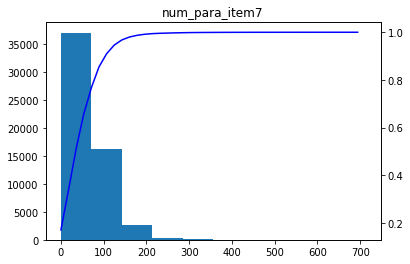

In [20]:
plot_data = np.clip(df_1.num_para,0,df_1.num_para.max())

fig, ax1 = plt.subplots()
ax1.hist(plot_data)

ax2 = ax1.twinx()
values, base = np.histogram(plot_data, bins=40)
cumulative = np.cumsum(values)/len(plot_data)
plt.plot(base[:-1], cumulative, c='blue')
plt.title('num_para_item7')
plt.show()

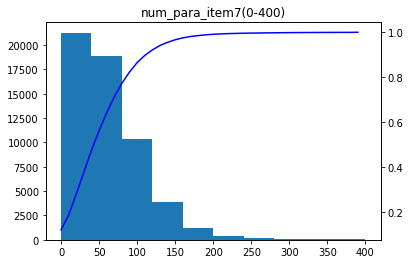

In [21]:
plot_data = np.clip(df_1.num_para,0,400)

fig, ax1 = plt.subplots()
ax1.hist(plot_data)

ax2 = ax1.twinx()
values, base = np.histogram(plot_data, bins=40)
cumulative = np.cumsum(values)/len(plot_data)
plt.plot(base[:-1], cumulative, c='blue')
plt.title('num_para_item7(0-400)')
plt.show()

In [34]:
# def ave_words_para(x,y):
#     r = 0
#     if x != 0:
#         r = y/x
#     return r

In [35]:
# df['ave_words_para'] = df.apply(lambda x: ave_words_para(x['num_para'], x['num_words']),axis=1)

In [31]:
# plot_data = np.clip(df.ave_words_para,0,df.ave_words_para.max())

# fig, ax1 = plt.subplots()
# ax1.hist(plot_data)

# ax2 = ax1.twinx()
# values, base = np.histogram(plot_data, bins=40)
# cumulative = np.cumsum(values)/len(plot_data)
# plt.plot(base[:-1], cumulative, c='blue')
# plt.title('ave_words_para')
# plt.show()

In [32]:
# plot_data = np.clip(df.ave_words_para,0,250)

# fig, ax1 = plt.subplots()
# ax1.hist(plot_data)

# ax2 = ax1.twinx()
# values, base = np.histogram(plot_data, bins=40)
# cumulative = np.cumsum(values)/len(plot_data)
# plt.plot(base[:-1], cumulative, c='blue')
# plt.title('ave_words_para')
# plt.show()

In [33]:
# plot_data = np.clip(df.ave_words_para,0,176)

# fig, ax1 = plt.subplots()
# ax1.hist(plot_data)

# ax2 = ax1.twinx()
# values, base = np.histogram(plot_data, bins=40)
# cumulative = np.cumsum(values)/len(plot_data)
# plt.plot(base[:-1], cumulative, c='blue')
# plt.title('ave_words_para')
# plt.show()

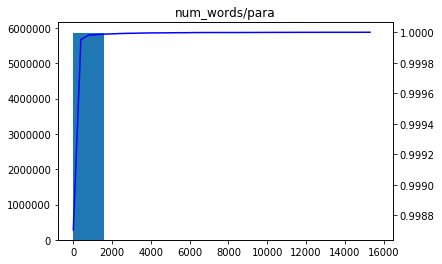

In [22]:
plot_data = np.clip(num_list,0,max(num_list))

fig, ax1 = plt.subplots()
ax1.hist(plot_data)

ax2 = ax1.twinx()
values, base = np.histogram(plot_data, bins=40)
cumulative = np.cumsum(values)/len(plot_data)
plt.plot(base[:-1], cumulative, c='blue')
plt.title('num_words/para')
plt.show()

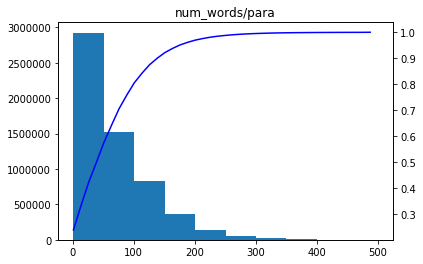

In [23]:
plot_data = np.clip(num_list,0,500)

fig, ax1 = plt.subplots()
ax1.hist(plot_data)

ax2 = ax1.twinx()
values, base = np.histogram(plot_data, bins=40)
cumulative = np.cumsum(values)/len(plot_data)
plt.plot(base[:-1], cumulative, c='blue')
plt.title('num_words/para')
plt.show()